
#Personal project Python 
##Find english words in the human proteome
---
Guétemme Colin
---

From a txt file containing 3000 english word we want to find this words in the a file containing the human proteome.

Implanted features:


*   Histogram of the words in 'n' letter occurence
*   Cell to find a word unsing the dictionnary index
*   Cell to find any sequences



# Import the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import os

Importation of the dataset.
the files 

In [0]:
from google.colab import files
English_words = files.upload()
Proteome = files.upload()

Saving english-words.txt to english-words.txt


Saving human-proteome.fasta to human-proteome.fasta


#Formatting data:
The variable `wfr` (words file read) will be transform into a list, each element corresponding to a word.

The variable `pfr` (proteome file read) will first be transform as a list where each element is a line of the file, then the lines wich are not corresponding to proteine sequences are removed. Then all is join in one long string and put in lower case to be compared with the english words. 


In [0]:
wf = open("english-words.txt", "r")
wfr = wf.read()
wfr = wfr.split()

wfr[500:510]

['colonial',
 'color',
 'column',
 'combination',
 'combine',
 'come',
 'comedy',
 'comfort',
 'comfortable',
 'command']

In [0]:
pf = open("human-proteome.fasta", "r")
pfr = pf.read()
pfr = pfr.split('\n') # necessary to check if a line is a sequence or not

i=0
while len(pfr)-1>i : # I use a while loop because the length of 'pfr' change when I delete an element
    if pfr[i][0]=='>': # This character appears each time a line do not corresponds to sequence of AA
        del pfr[i]
        # In this case we do not increment 'i' because since we delete element pfr[i], there is a new element at pfr[i]
    else :
        i+=1 # Increment 'i' for the while loop

pfr = ''.join(pfr[0 : len(pfr)]) # Merge all the sequences together
pfr = pfr.lower() # Put the new long sequence in lower case to compare it to the english words (also in lower case)

# Histogram of the number of letter
this cell find the distribution of words with "n" letters

!! LONG TIME TO PROCESS !! 

I've only looked at the words between 4 and 11 letters (to avoid the very high frequency of 1, 2 and 3 letters words).


In [0]:
Nb_letter=[0,0,0,0,0,0,0,0]
Nb_letter=[6023, 1712, 116, 23, 5, 0, 0, 0]
for i in range(1000,len(wfr)):
  print(i)
  if len(wfr[i]) > 3: #check that the word contain 4 letters or more
    for j in range(0,len(pfr)-len(wfr[i])):
      if pfr[j : j+len(wfr[i])] == wfr[i]:
        Nb_letter[len(wfr[i])-4]+=1
# result from the cell
#Nb_letter=[34407, 2982, 160, 23, 5, 0, 0, 0]

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199


[34407, 2982, 160, 23, 5, 0, 0, 0]


Text(0, 0.5, 'Occurences in the proteome')

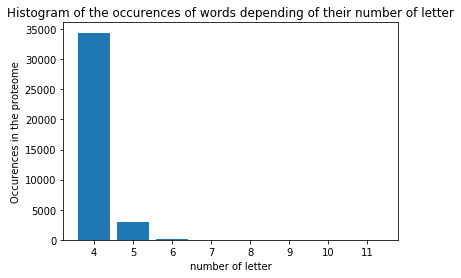

In [0]:
print(Nb_letter)
plt.bar([4,5,6,7,8,9,10,11],Nb_letter)
plt.title('Histogram of the occurences of words depending of their number of letter')
plt.xlabel('number of letter')
plt.ylabel('Occurences in the proteome')

# Find a specific word

This cell allow the user to find a specific word with the index of the word in the dictionnary 

In [0]:
i=157
print(wfr[i])
a=0
for j in range(0,len(pfr)-len(wfr[i])):
  if pfr[j : j+len(wfr[i])] == wfr[i]:
    #print(j)
    a+=1

print("\n the number of occurences is:")
print(a)

area
14835
37026
66762
140684
202350
256052
342742
372989
381125
418855
452247
530597
612710
621111
656330
733230
752110
756233
778982
832033
898671
939101
973489
1042712
1056273
1099517
1111962
1191992
1246396
1267073
1283818
1328329
1391556
1465029
1474001
1554472
1567265
1592877
1611328
1752095
1863816
1907151
2015651
2041195
2051214
2179971
2191740
2201793
2248310
2258779
2336765
2337489
2338213
2339303
2390668
2391396
2391758
2392124
2392852
2393580
2393952
2395404
2396128
2396937
2417014
2435908
2438271
2470029
2514692
2520352
2521083
2521449
2521815
2525209
2525571
2583908
2675112
2760006
2778341
2810691
2829064
2843498
2877209
2916205
2945091
2945640
2946189
2946738
2947287
2978551
2991070
3040350
3043642
3048224
3156572
3160256
3161018
3162024
3186025
3197181
3199681
3210328
3289298
3322076
3387424
3450971
3453346
3456606
3488314
3495415
3621574
3622123
3648990
3689914
3695638
3817060
3827719
3840372
3842463
3843012
3868106
3904126
4014620
4015245
4166227
4183171
4227244
42957

In [0]:
word="green"
a=0
for j in range(0,len(pfr)-len(word)):
  if pfr[j : j+len(word)] == word:
    #print(j)
    a+=1

print("\n the number of occurences is:")
print(a)


 the number of occurences is:
6
